0.1327958106994629
0.2616145610809326
0.382159948348999
0.4908151626586914
0.6134600639343262
0.7144966125488281
0.8066694736480713
0.9081802368164062
1.0077006816864014
1.1063816547393799


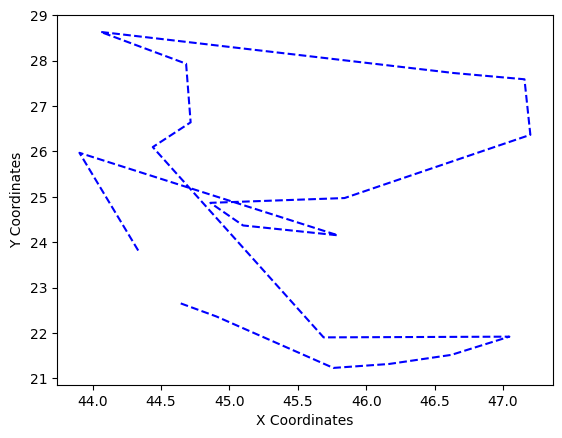

In [4]:
import random
import math
import time
import copy
import matplotlib.pyplot as plt

start_time = time.time()
def read_cities(filename):
    cities_data = {}
    with open(filename, 'r') as file:
        for line in file:
            parts = line.strip().split()
            city_name = parts[0]
            coordinates = tuple(map(float, parts[1:]))
            cities_data[city_name] = coordinates
    return cities_data

cities_data = read_cities('Romania_cities.txt')
cities = list(cities_data.keys())

def simulated_annealing(initial_state):
    initial_temp = 5000
    alpha = 0.99
    current_temp = initial_temp
    solution = initial_state
    same_solution = 0
    same_cost_diff = 0
    
    while same_solution < 20 and same_cost_diff < 20:
        neighbor = get_neighbors(solution)
        cost_diff = get_cost(neighbor) - get_cost(solution)
        
        if cost_diff > 0 or random.uniform(0, 1) <= math.exp(cost_diff / current_temp):
            solution = neighbor
            same_solution = 0
            same_cost_diff = 0
        else:
            same_solution += 1
            same_cost_diff += 1

        current_temp *= alpha

    return solution, 1 / get_cost(solution)

def get_cost(state):
    
    distance = 0
    for i in range(len(state)):
        from_city = state[i]
        to_city = None
        if i+1<len(state):
            to_city=state[i+1]
        else:
            to_city=state[0]
        distance += math.sqrt((cities_data[from_city][0] - cities_data[to_city][0]) ** 2 + 
                              (cities_data[from_city][1] - cities_data[to_city][1]) ** 2)
    fitness=1/float(distance)

    return fitness

def get_neighbors(state):
    neighbor = state[::]
    func = random.choice([0,1,2,3])
    if func == 0:
        inverse(neighbor)
    elif func == 1:
        insert_node(neighbor)
    elif func == 2:
        swap(neighbor)
    else:
        insert_subroute(neighbor)
     
    return neighbor

def inverse(state):
    node_one = random.choice(state)
    new_list = list(filter(lambda city: city != node_one, state)) 
    node_two = random.choice(new_list)
    min_index = min(state.index(node_one), state.index(node_two))
    max_index = max(state.index(node_one), state.index(node_two))
    state[min_index:max_index] = state[min_index:max_index][::-1]
    return state

def insert_node(state):
    node_j = random.choice(state)
    state.remove(node_j)
    node_i = random.choice(state)
    index = state.index(node_i)
    state.insert(index, node_j)
    return state

def swap(state):
    pos_one = random.choice(range(len(state)))
    pos_two = random.choice(range(len(state)))
    state[pos_one], state[pos_two] = state[pos_two], state[pos_one]
    return state

def insert_subroute(state):
    subroute_a = random.choice(range(len(state)))
    subroute_b = random.choice(range(len(state)))
    subroute = state[min(subroute_a,subroute_b):max(subroute_a, subroute_b)]
    del state[min(subroute_a,subroute_b):max(subroute_a, subroute_b)]
    insert_pos = random.choice(range(len(state)))
    for i in subroute:
        state.insert(insert_pos, i)
    return state

for i in range(10):     
    start = time.time()
    route, route_distance = simulated_annealing(cities)
    
    
    xs = [cities_data[city][0] for city in route]
    ys = [cities_data[city][1] for city in route]

    plt.clf()
    
    plt.plot(xs, ys, 'b--')
    plt.xlabel('X Coordinates')
    plt.ylabel('Y Coordinates')
    # plt.show()

    end_time = time.time()
    print(end_time - start_time)
